### Social Network Analysis

In [1]:
import os
os.chdir('D:\\Learning\\CU\\Courses\\EDM\\Output')

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
SNAdata=pd.read_csv("ICE8_Data.csv",index_col=0) # index_col=0 is used to contain the first column to be row names.
G=nx.Graph(SNAdata)

In [4]:
# I have updated decorator version becaurse Error in randon_state decorator with decorator 5.0.6
#pip install decorator==5.0.7

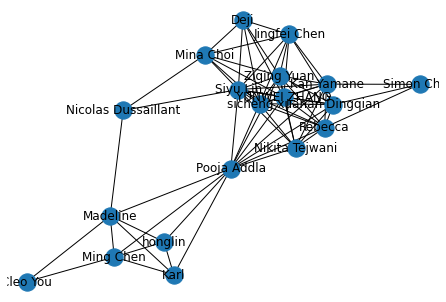

In [5]:
nx.draw(G,with_labels=True)

### Network Statisitcs

#### Density  
A measure of how complete the graph is (how many edges are present in the network as compared to the total possible number of edges)  
(40% links among all possible links demonstrats that the network is quite well-connected, this is going to be harder and harder as the network size gets bigger.)

In [6]:
density=nx.density(G)
print('The edge density is: %.3f'%(density)) # a format for the ouput decimal places

The edge density is: 0.415


#### Degree Centrality  
Degree(how many edges each node has)  
A measure gives an idea of how 'important' each node is in the network.  
(The assumption is that nodes with the most edges are the most important/central as they are directly connected to lots of other nodes.)

In [7]:
degree=nx.degree(G)
degree

DegreeView({'Nicolas Dussaillant': 3, 'Ming Chen': 5, 'Rebecca': 9, 'Nikita Tejwani': 8, 'Simon Chen': 3, 'Pooja Addla': 12, 'honglin': 4, 'Karl': 4, 'sicheng xu': 11, 'Jianan Dingqian': 10, 'Siyu Lin': 12, 'Ziqing Yuan': 11, 'Jingfei Chen': 8, 'Mina Choi': 7, 'Cleo You': 2, 'Deji': 6, 'Kan Yamane': 10, 'YUNWEI ZHANG': 11, 'Madeline': 6})

In [8]:
# visualize the dictionary
pd.DataFrame(degree)

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


#### Closeness centrality  
Closeness centrality measures "how quickly" a node can travel to the rest of the graph.

In [9]:
close=nx.closeness_centrality(G)
close

{'Nicolas Dussaillant': 0.5294117647058824,
 'Ming Chen': 0.5142857142857142,
 'Rebecca': 0.6428571428571429,
 'Nikita Tejwani': 0.6206896551724138,
 'Simon Chen': 0.42857142857142855,
 'Pooja Addla': 0.75,
 'honglin': 0.5,
 'Karl': 0.5,
 'sicheng xu': 0.6923076923076923,
 'Jianan Dingqian': 0.6666666666666666,
 'Siyu Lin': 0.72,
 'Ziqing Yuan': 0.6923076923076923,
 'Jingfei Chen': 0.5294117647058824,
 'Mina Choi': 0.5294117647058824,
 'Cleo You': 0.3673469387755102,
 'Deji': 0.4864864864864865,
 'Kan Yamane': 0.6666666666666666,
 'YUNWEI ZHANG': 0.6923076923076923,
 'Madeline': 0.5454545454545454}

In [10]:
pd.DataFrame.from_dict(close,orient='index')
# closeness_centrality returns a dictionary in a different way compared to degree()
# Therefore, we need to specify the orientation

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


#### Betweenness centrality
This is a way of detecting the amount of influence a node has over the flow of information in a graph.  
It is often used to find nodes that serve as a bridge from one part of a graph to another.

In [11]:
between=nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between,orient='index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


### Community detection

In [14]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
c=list(greedy_modularity_communities(G))
print(len(c))

2


In [13]:
community_0=sorted(c[0])
community_1=sorted(c[1])

print(community_0)
print(community_1)

['Deji', 'Jianan Dingqian', 'Jingfei Chen', 'Kan Yamane', 'Mina Choi', 'Nicolas Dussaillant', 'Nikita Tejwani', 'Rebecca', 'Simon Chen', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']


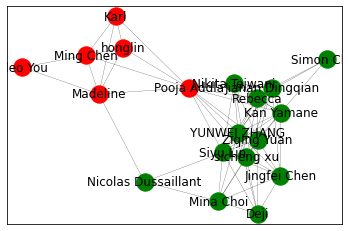

In [15]:
# Set seed
np.random.seed(123)
# Obtain the positions of the nodes
pos=nx.spring_layout(G)
# Print out all the nodes with color
nx.draw_networkx_nodes(G,pos=pos,nodelist=community_0,node_color='green',label=True)
nx.draw_networkx_nodes(G,pos=pos,nodelist=community_1,node_color='red',label=True)
# Print out the edges
nx.draw_networkx_edges(G,pos=pos,width=0.2)
# Make sure the label is printed
nx.draw_networkx_labels(G,pos=pos)
# Show the plot so it supress the other networkx outputs
plt.show()

#### Make The Network Prettier 
(size and transparency of the nodes and edges)

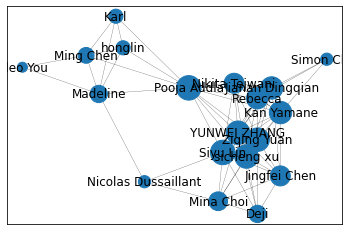

In [16]:
## Change the sizes of nodes
nx.draw_networkx_nodes(G,pos=pos,nodelist=dict(degree).keys(),node_size=[v*50 for v in dict(degree).values()],label=True)
# The default size of a networkx node is 300,so we multiply the degree by 50 times to make them clear
nx.draw_networkx_edges(G,pos=pos,width=0.2)
nx.draw_networkx_labels(G,pos=pos)
plt.show()

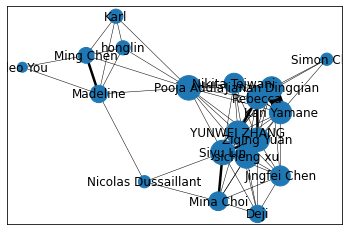

In [19]:
## Change the widths of edges
eWeight=nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G,pos=pos,nodelist=dict(degree).keys(),node_size=[v*50 for v in dict(degree).values()],label=True)
nx.draw_networkx_edges(G,pos,width=[5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G,pos=pos)

plt.show()

#### Put every changes together  
we need to first create three(two here) dictionaries corresponding to each coomunity from the degree dictionary, then pass the information to the node size.

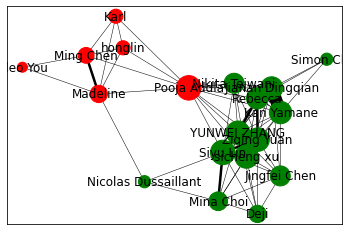

In [35]:
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}

# Print out the nodes with color and size
nx.draw_networkx_nodes(G,pos=pos,nodelist=community_0,node_color='green',node_size=[v*50 for v in community_0_degree.values()],label=True)
nx.draw_networkx_nodes(G,pos=pos,nodelist=community_1,node_color='red',node_size=[v*50 for v in community_1_degree.values()],label=True)
# Print out the edges with proper width
nx.draw_networkx_edges(G,pos,width=[5**e/10 for e in eWeight.values()])
# Make sure the label is printed
nx.draw_networkx_labels(G,pos=pos)
# Show the plot so it supress the other networkx outputs
plt.show()